In [4]:
import pandas as pd

In [30]:
df=pd.read_csv("wiki_data.csv")

In [31]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [7]:
def clean_text(df,col_name):
    df[col_name]=df[col_name].str.lower()

    df[col_name]=df[col_name].str.replace(r'[^\w\s]',' ',regex=True)

    df[col_name]=df[col_name].str.replace(r'[\d]',' ',regex=True)

    return df
    

In [8]:
clean_text(df,"text")

,Unnamed: 0,text
0,1,anovo\n\nanovo formerly a novo is a computer...
1,2,battery indicator\n\na battery indicator also...
2,3,bob pease\n\nrobert allen pease august ...
3,4,cavnet\n\ncavnet was a secure military forum w...
4,5,clidar\n\nthe clidar is a scientific instrumen...
...,...,...
10854,10855,soundcast\n\nsoundcast llc is a privately fund...
10855,10856,spectrum analyzer\n\na spectrum analyzer measu...
10856,10857,telepresence technology\n\ntelepresence techno...
10857,10858,trans pacific profiler network\n\nthe trans pa...


In [10]:
df.head()

,Unnamed: 0,text
0,1,anovo\n\nanovo formerly a novo is a computer...
1,2,battery indicator\n\na battery indicator also...
2,3,bob pease\n\nrobert allen pease august ...
3,4,cavnet\n\ncavnet was a secure military forum w...
4,5,clidar\n\nthe clidar is a scientific instrumen...


In [9]:
import nltk
nltk.download("stopwords")
from nltk.corpus import  stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iremu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sw=stopwords.words("english")

In [12]:
def  remove_stopwords(df,col_name):
    df[col_name]=df[col_name].apply(lambda x: " ".join(x for x in str.split(x) if x not in sw))
    return df

In [13]:
remove_stopwords(df,"text")

,Unnamed: 0,text
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...
...,...,...
10854,10855,soundcast soundcast llc privately funded compa...
10855,10856,spectrum analyzer spectrum analyzer measures m...
10856,10857,telepresence technology telepresence technolog...
10857,10858,trans pacific profiler network trans pacific p...


In [14]:
temp_df=pd.Series(' '.join(df["text"]).split()).value_counts()

In [15]:
drop=temp_df[temp_df<1000]

In [16]:
df["text"]=df["text"].apply(lambda x :" ".join(x for x in x.split() if x not in drop))

In [17]:
df.head()

,Unnamed: 0,text
0,1,computer services company based france founded...
1,2,battery battery also known battery device info...
2,3,august â â june analog integrated circuit desi...
3,4,military became april part allows fast access ...
4,5,scientific instrument used lower camera turn l...


In [ ]:
tf=df["text"].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [19]:

tf.columns=["words","tf"]

In [20]:
tf.head(2)

,words,tf
0,company,10882.0
1,computer,5436.0


In [21]:
import matplotlib.pyplot as plt

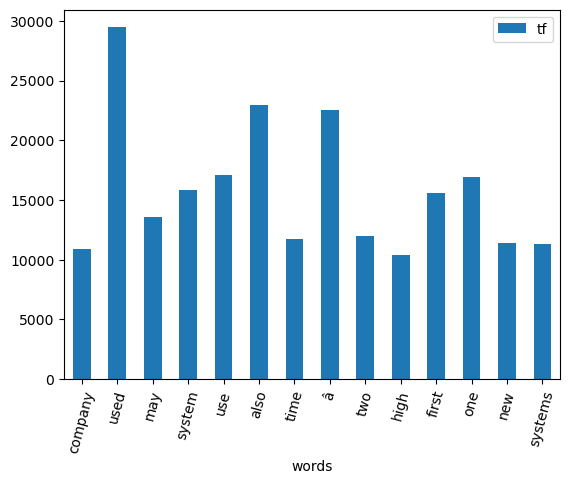

In [26]:
tf[tf["tf"]>10000].plot.bar(x="words",y="tf")
plt.xticks(rotation=75)
plt.show()

In [27]:
text=" ".join(i for i in df.text)

In [28]:
from wordcloud import WordCloud
wordCloud=WordCloud().generate(text)

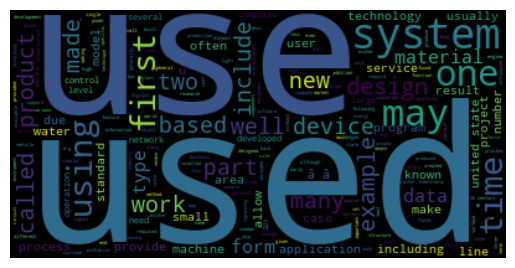

In [29]:
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [38]:
def WikiMediaAnalysis(df,col_name,plt=False):
    df[col_name]=df[col_name].str.lower()

    df[col_name]=df[col_name].str.replace(r'[^\w\s]',' ',regex=True)

    df[col_name]=df[col_name].str.replace(r'[\d]',' ',regex=True)

    df[col_name]=df[col_name].apply(lambda x: " ".join(x for x in str.split(x) if x not in sw))

    temp_df=pd.Series(' '.join(df[col_name]).split()).value_counts()
    
    drop=temp_df[temp_df<1000]
    df[col_name]=df[col_name].apply(lambda x :" ".join(x for x in x.split() if x not in drop))

    if plt==True:
       tf=df[col_name].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
       tf.columns=["words","tf"]
       tf[tf["tf"]>10000].plot.bar(x="words",y="tf")
       plt.xticks(rotation=75)
       plt.show()

    return df

In [39]:
 WikiMediaAnalysis(df,"text")

,Unnamed: 0,text
0,1,computer services company based france founded...
1,2,battery battery also known battery device info...
2,3,august â â june analog integrated circuit desi...
3,4,military became april part allows fast access ...
4,5,scientific instrument used lower camera turn l...
...,...,...
10854,10855,company wireless audio technologies consumer c...
10855,10856,input signal frequency within full frequency r...
10856,10857,technology technology term used national combi...
10857,10858,network network usually system wind installed ...


In [ ]:
 WikiMediaAnalysis(df,"text",True) ## Çok fazla çıktı var ,True deyince grafik de gözüktü.